**QF600 - Gabriel Woon  
HW2 - Capital Asset Pricing Model (CAPM) & Linear Factor Models**

## Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## Import Data

In [2]:
data_ind_raw = pd.read_excel('Industry_Portfolios.xlsx')
data_ind = data_ind_raw.drop("Date", axis = 1)
data_mkt_raw = pd.read_excel('Market_Portfolio.xlsx')
data_mkt = data_mkt_raw.drop("Date", axis = 1)

C:\ProgramData\Anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


## Regress Market Model (MM)

In [3]:
# risk-free rate
Rf = 0.13

In [4]:
# industry excess return (y variable)
ind_excess = np.array(data_ind) - Rf

In [5]:
# market excess return (x variable)
mkt_excess = np.array(data_mkt) - Rf

In [6]:
# market model regression
MM = LinearRegression().fit(mkt_excess ,ind_excess)
MM_alpha = MM.intercept_
MM_beta = MM.coef_

In [7]:
# market model coefficients
MM_coefficient = pd.DataFrame(np.concatenate((MM_alpha.reshape(1,10),MM_beta.reshape(1,10))),
                                       index = ['Intercept (α)','Slope (β)'],
                                       columns = data_ind.columns)
MM_coefficient

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
Intercept (α),0.369443,-0.415599,0.159771,0.501719,-0.064020,0.194691,0.275492,0.237841,0.444585,-0.387135
Slope (β),0.652647,1.648536,1.169846,0.969850,1.132969,0.900729,0.826492,0.673036,0.538086,1.207309


## Regress Capital Asset Pricing Model (CAPM)

In [8]:
# merge data
data_merge = data_ind_raw.merge(data_mkt_raw)
data_merge = data_merge.drop("Date", axis = 1)

# consolidated mean return (y variable)
consolidated_return = data_merge.mean()
consolidated_return = pd.DataFrame(np.array(consolidated_return),columns=['Expected Return'], index = data_merge.columns); consolidated_return

,Expected Return
NoDur,0.902833
Durbl,0.733333
Manuf,1.012833
Enrgy,1.231167
HiTec,0.766250
Telcm,0.881417
Shops,0.916333
Hlth,0.783833
Utils,0.907167
Other,0.489083


In [9]:
# market covariance matrix 
consolidated_cov = data_merge.cov(); consolidated_cov["Market"]

NoDur     12.300096
Durbl     31.069071
Manuf     22.047469
Enrgy     18.278244
HiTec     21.352470
Telcm     16.975563
Shops     15.576461
Hlth      12.684344
Utils     10.141021
Other     22.753517
Market    18.846466
Name: Market, dtype: float64

In [10]:
# market variance
market_var = consolidated_cov.iloc[10,10]; market_var

18.84646604341736

In [11]:
# consolidated beta (x variable)
consolidated_beta = consolidated_cov["Market"]/market_var
consolidated_beta = pd.DataFrame(np.array(consolidated_beta),columns=['Beta (β)'], index = data_merge.columns); consolidated_beta

,Beta (β)
NoDur,0.652647
Durbl,1.648536
Manuf,1.169846
Enrgy,0.969850
HiTec,1.132969
Telcm,0.900729
Shops,0.826492
Hlth,0.673036
Utils,0.538086
Other,1.207309


In [12]:
# capital asset pricing model regression
CAPM = LinearRegression().fit(consolidated_beta, consolidated_return)
CAPM_alpha = CAPM.intercept_
CAPM_beta = CAPM.coef_[0]

In [13]:
# capital asset pricing model coefficients
pd.DataFrame((CAPM_alpha, CAPM_beta), columns=["Coefficient"], index=["Intercept (α)", "Slope (β)"])

,Coefficient
Intercept (α),1.032768
Slope (β),-0.185467


## Build the Security Market Line (SML)

In [14]:
# security market line returns
SML_return = np.arange(0, 2.01 , 0.05); SML_return

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05,
       1.1 , 1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 , 1.55, 1.6 ,
       1.65, 1.7 , 1.75, 1.8 , 1.85, 1.9 , 1.95, 2.  ])

In [15]:
#security market line beta
SML_beta = CAPM_alpha + CAPM_beta*SML_return; SML_beta

array([1.03276837, 1.023495  , 1.01422162, 1.00494825, 0.99567488,
       0.9864015 , 0.97712813, 0.96785476, 0.95858138, 0.94930801,
       0.94003464, 0.93076127, 0.92148789, 0.91221452, 0.90294115,
       0.89366777, 0.8843944 , 0.87512103, 0.86584766, 0.85657428,
       0.84730091, 0.83802754, 0.82875416, 0.81948079, 0.81020742,
       0.80093405, 0.79166067, 0.7823873 , 0.77311393, 0.76384055,
       0.75456718, 0.74529381, 0.73602043, 0.72674706, 0.71747369,
       0.70820032, 0.69892694, 0.68965357, 0.6803802 , 0.67110682,
       0.66183345])

## Plot the Security Market Line (SML)

<ipython-input-16-346276e62e68>:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


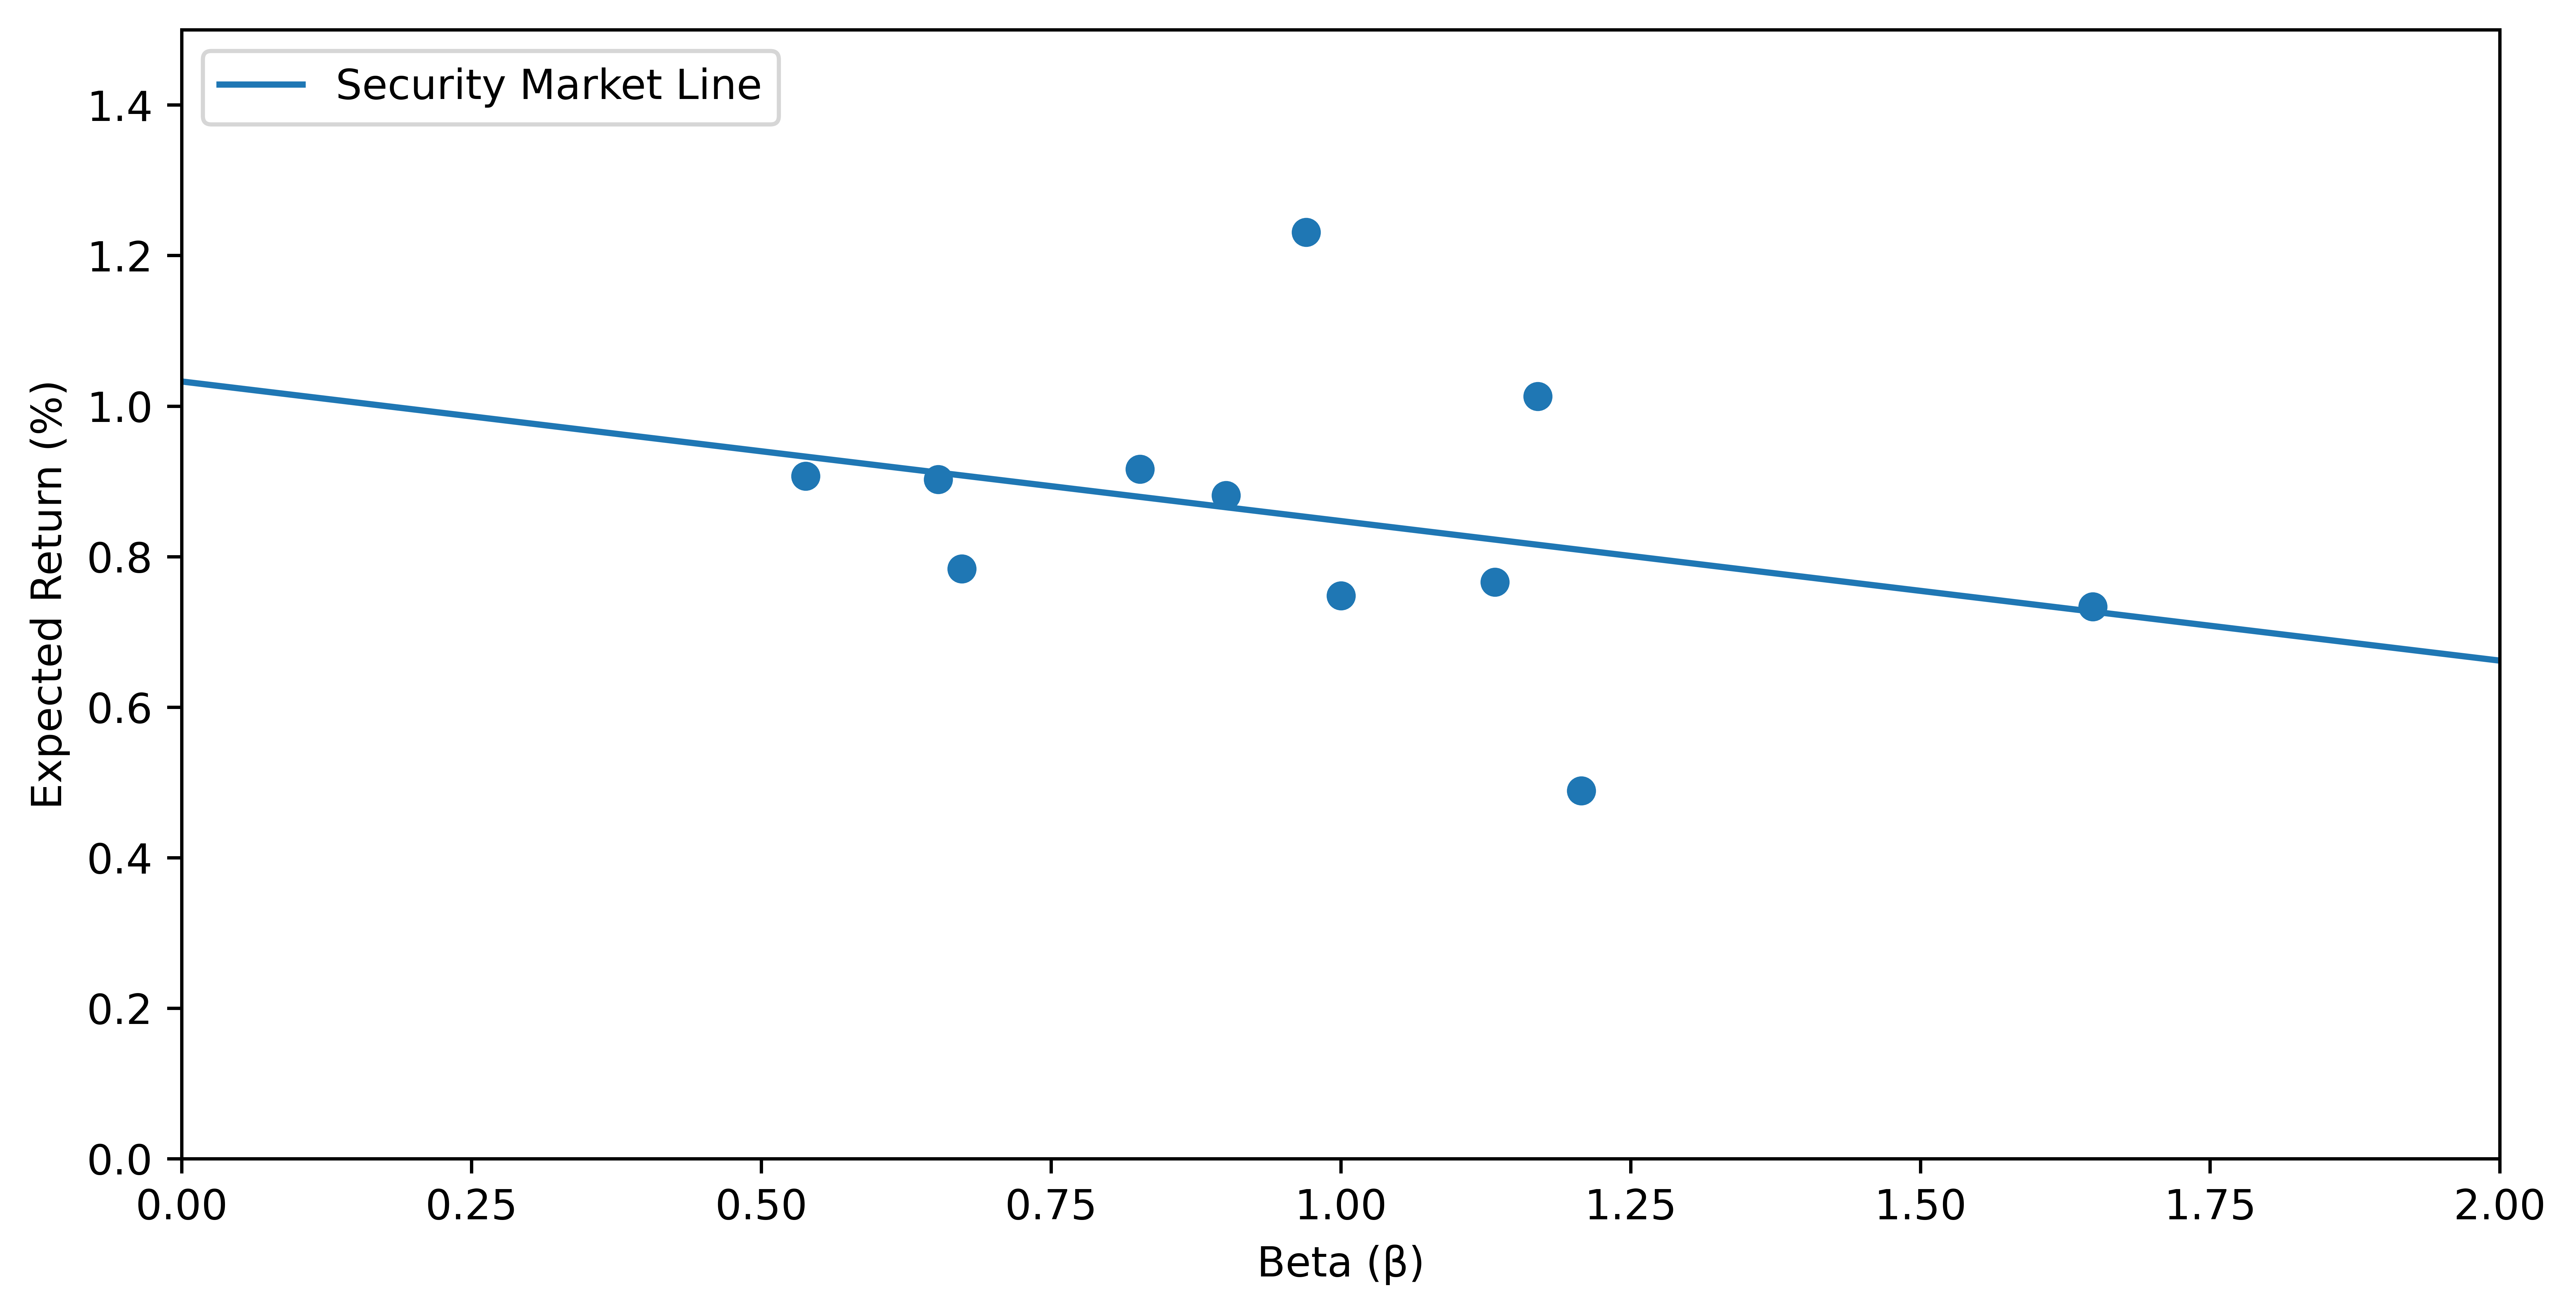

In [16]:
plt.figure(figsize = (10, 5), dpi = 900)

plt.scatter(consolidated_beta, consolidated_return)
plt.plot(SML_return, SML_beta,label ='SML')

plt.ylabel('Expected Return (%)')
plt.xlabel('Beta (β)')
plt.legend(["Security Market Line"], loc=2)

axes = plt.gca()
axes.set_xlim([0,2])
axes.set_ylim([0,1.5])
ax = plt.axes()

## Economic Significance

**Briefly explain the economic significance of the market model intercept and slope coefficients**

Intercept:  
The return from the asset that is not related to the market’s return.  
This is abnormal extra return (alpha) from the security.
  
Slope:
The return from the security explained by the market’s return (exposure to systematic risk).

**Briefly explain the economic significance of the SML**

The SML is useful in determining whether the security offers a favorable expected return compared to its level of systematic risk.  

The slope of the SML is the Treynor ratio of the market portfolio that is equal to beta.  
Any security above the SML is undervalued (Treynor ratio more than SML beta), while any security below the SML is overvalued (Treynor ratio less than SML beta).

CAPM being an equilibrium pricing model, indicates that if a stock can be consistently above the SML, it is said to have abnormal extra return (alpha).
